------------------------
#### Mean
--------------------

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Sample data
data = [10, 15, 20, 25, 30]

# Mean (Arithmetic Mean)
mean_arithmetic = np.mean(data)

# Geometric Mean
geometric_mean = np.exp(np.mean(np.log(data)))

# Harmonic Mean
harmonic_mean = len(data) / np.sum(1 / np.array(data))

# Weighted Mean
weights = [0.2, 0.3, 0.1, 0.2, 0.2]
weighted_mean = np.average(data, weights=weights)

# Displaying results
print(f"Arithmetic Mean: {mean_arithmetic:.2f}")
print(f"Geometric Mean: {geometric_mean:.2f}")
print(f"Harmonic Mean: {harmonic_mean:.2f}")
print(f"Weighted Mean: {weighted_mean:.2f}")


Arithmetic Mean: 20.00
Geometric Mean: 18.64
Harmonic Mean: 17.24
Weighted Mean: 19.50


#### Arithmetic Mean:

In [3]:
import numpy as np

data = [10, 20, 30, 40, 50]
arithmetic_mean = np.mean(data)
print(f"Arithmetic Mean: {arithmetic_mean:.2f}")


Arithmetic Mean: 30.00


Use Case: General representation of average; applicable in most scenarios.

#### Geometric Mean

Use Case: Investment returns; measuring compound growth rates over time.

In [3]:
import matplotlib.pyplot as plt

**Example** - simple GM compute 

In [6]:
# Sample dataset
data = [5, 10, 8, 12, 6]

geometric_mean = np.exp(np.mean(np.log(data)))

print(f"Geometric Mean: {geometric_mean:.2f}")

Geometric Mean: 7.80


In [5]:
# Sample dataset
data = [2, 4, 8]

geometric_mean = np.exp(np.mean(np.log(data)))

print(f"Geometric Mean: {geometric_mean:.2f}")

Geometric Mean: 4.00


Geometric Mean: 4.0


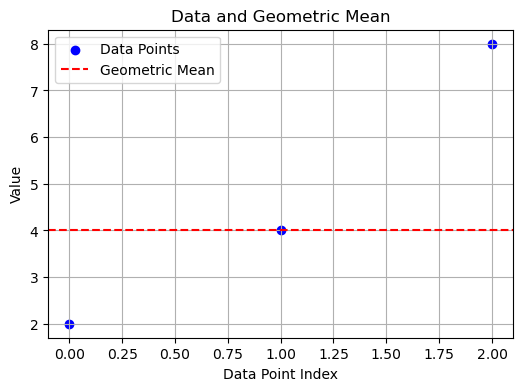

In [23]:
# Plot the data and geometric mean
plt.figure(figsize=(6, 4))
plt.scatter(range(len(data)), data, color='blue', label='Data Points')
plt.axhline(y=geometric_mean, color='red', linestyle='--', label='Geometric Mean')
plt.xlabel('Data Point Index')
plt.ylabel('Value')
plt.title('Data and Geometric Mean')
plt.legend()
plt.grid(True)

print("Geometric Mean:", geometric_mean)

**Example** - missing value impute

In [4]:
# Create a sample dataset with missing values
data = {
    'Year':          [1, 2, 3, 4],
    'Initial_Value': [1000, 1050, np.nan, 1193.09],
    'Interest_Rate': [0.05, 0.06, 0.04, 0.03],
    'Ending_Value':  [1050, 1113, np.nan, np.nan]
}

In [7]:
df = pd.DataFrame(data)

# Sort the DataFrame by 'Year' column
df = df.sort_values('Year')

In [8]:
# Interpolate missing values while preserving the multiplicative relationship
for col in ['Initial_Value', 'Ending_Value']:
    
    missing_indices = df.index[df[col].isnull()]
    
    for idx in missing_indices:
        current_year = df.loc[idx, 'Year']
        prev_year    = current_year - 1
        next_year    = current_year + 1
        
        if prev_year in df['Year'].values and next_year in df['Year'].values:
            prev_value = df.loc[df['Year'] == prev_year, col].values[0]
            next_value = df.loc[df['Year'] == next_year, col].values[0]
            
            prev_interest_rate = df.loc[df['Year'] == prev_year, 'Interest_Rate'].values[0]
            next_interest_rate = df.loc[df['Year'] == next_year, 'Interest_Rate'].values[0]

            interpolated_value = prev_value * (1 + prev_interest_rate) / (1 + next_interest_rate)
            df.loc[idx, col] = interpolated_value

In [9]:
df

,Year,Initial_Value,Interest_Rate,Ending_Value
0,1,1000.000000,0.05,1050.000000
1,2,1050.000000,0.06,1113.000000
2,3,1080.582524,0.04,1145.417476
3,4,1193.090000,0.03,NaN


**Example** - How growth rates, compound interest are exponential data?

- `Growth rates` and `compound interest` often exhibit exponential behavior because they involve repeated multiplication over time, leading to exponential growth

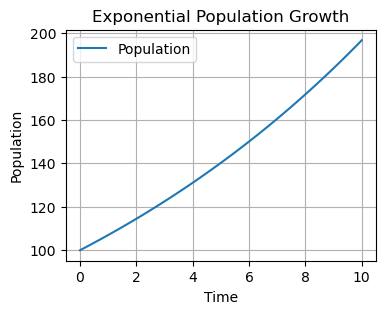

In [36]:
# Generate time points
time = np.linspace(0, 10, 100)

# Exponential growth formula: population = initial_population * growth_rate^time

initial_population = 100        # Starting population
growth_rate        = 1.07       # Growth rate of 7% per time unit

population         = initial_population * (growth_rate ** time)

# Plot the population growth
plt.figure(figsize=(4, 3))
plt.plot(time, population, label='Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Exponential Population Growth')
plt.legend()
plt.grid()

**Example** - exponenetial data and transformations

the variable values decrease exponentially as the index increases. 

Common examples could include decay of radioactive substances over time or diminishing returns in some business metrics. 

To handle such variables, you might consider applying a logarithmic transformation. 

This can help linearize the decay trend, making it more amenable to linear regression models.

In [40]:
# Generate synthetic data with exponential decay pattern
n_samples  = 100
time       = np.linspace(1, 10, n_samples)
decay_data = np.exp(-0.5 * time)  # Exponential decay

# Apply logarithmic transformation
decay_transformed_data = np.log(decay_data)

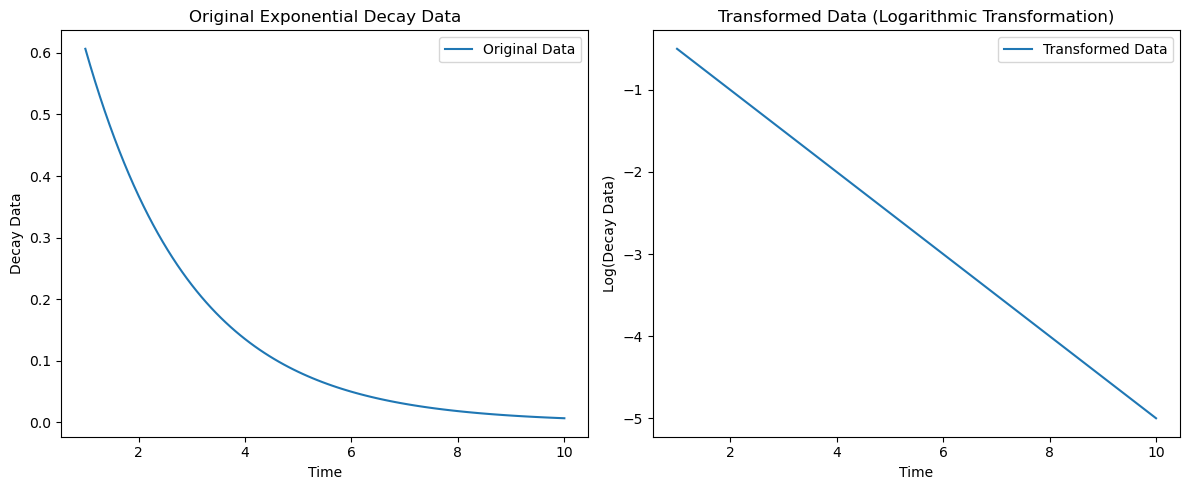

In [41]:
# Visualize the original and transformed data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(time, decay_data, label='Original Data')
plt.xlabel('Time')
plt.ylabel('Decay Data')
plt.title('Original Exponential Decay Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(time, decay_transformed_data, label='Transformed Data')
plt.xlabel('Time')
plt.ylabel('Log(Decay Data)')
plt.title('Transformed Data (Logarithmic Transformation)')
plt.legend()

plt.tight_layout()

**Example** - how do we linearize the exp data?

In [44]:
arr = np.array([1, 2, 3, 4])

exp_values = np.exp(arr)
print(exp_values)
print(np.log(exp_values))

[ 2.71828183  7.3890561  20.08553692 54.59815003]
[1. 2. 3. 4.]


**Example** - Exponential data and ML

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Step 1: Generate synthetic data (blobs)
n_samples  = 300
n_features = 2
X, _       = make_blobs(n_samples  =n_samples, 
                        n_features =n_features, 
                        centers    =3, 
                        cluster_std=1.0, 
                        random_state=42)

In [14]:
X_new = X.copy()

In [15]:
# Step 2: Convert the data to exponential form
X_new[:, 0] = np.exp(X[:, 0])
X_new[:, 1] = np.exp(X[:, 1])

C:\Users\bhupe\AppData\Local\Temp\ipykernel_19792\1303525982.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
C:\Users\bhupe\AppData\Local\Temp\ipykernel_19792\1303525982.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_new[:, 0], X_new[:, 1], s=50, cmap='viridis')


Text(0.5, 1.0, 'Exponential Data')

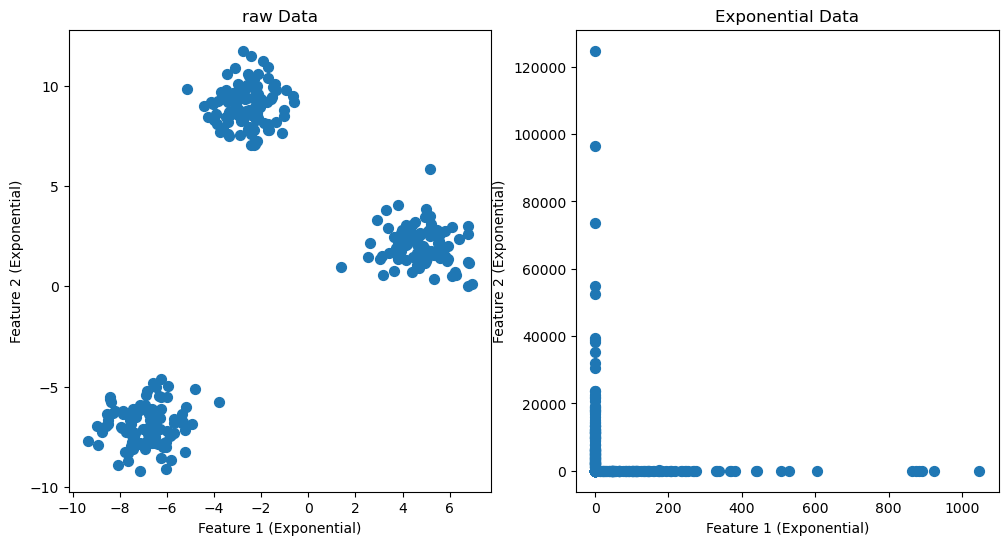

In [16]:
# Step 3: Plot the raw data & exponential data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.xlabel('Feature 1 (Exponential)')
plt.ylabel('Feature 2 (Exponential)')
plt.title('raw Data')

plt.subplot(1, 2, 2)
plt.scatter(X_new[:, 0], X_new[:, 1], s=50, cmap='viridis')
plt.xlabel('Feature 1 (Exponential)')
plt.ylabel('Feature 2 (Exponential)')
plt.title('Exponential Data')

In [17]:
# Step 4: Apply k-means clustering to the exponential data
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

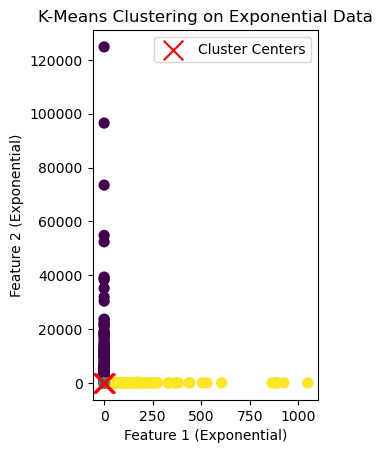

In [18]:
# Step 5: Plot the clustering results on the exponential data
plt.subplot(1, 2, 2)
plt.scatter(X_new[:, 0], X_new[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Feature 1 (Exponential)')
plt.ylabel('Feature 2 (Exponential)')
plt.title('K-Means Clustering on Exponential Data')
plt.legend()

In [19]:
# Step 6: Logarithmic transformation
X_log = np.log(X_new)

In [21]:
# Step 7: Apply k-means clustering to the log-transformed data
kmeans_log = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_log.fit(X_log)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

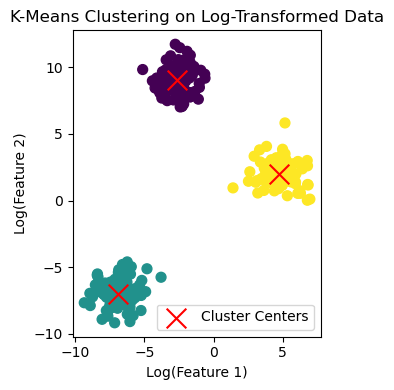

In [22]:
# Step 8: Plot the clustering results on the log-transformed data
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_log[:, 0], X_log[:, 1], c=kmeans_log.labels_, s=50, cmap='viridis')
plt.scatter(kmeans_log.cluster_centers_[:, 0], kmeans_log.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.xlabel('Log(Feature 1)')
plt.ylabel('Log(Feature 2)')
plt.title('K-Means Clustering on Log-Transformed Data')
plt.legend()

plt.tight_layout()

**Example** - how do we assess if the data is exponential form

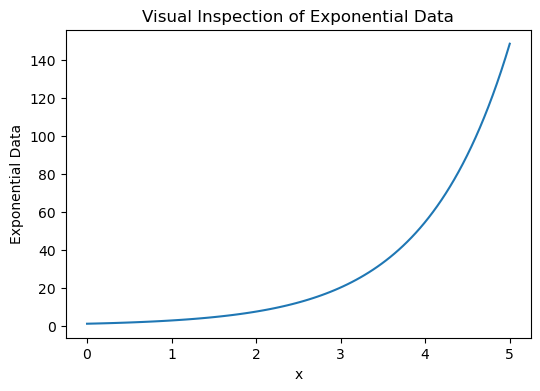

In [80]:
# Visual Inspection

# Generate synthetic data with exponential growth
x = np.linspace(0, 5, 100)
exponential_data = np.exp(x)  # Exponential growth

# Plot the data
plt.figure(figsize=(6, 4))
plt.plot(x, exponential_data)
plt.xlabel('x')
plt.ylabel('Exponential Data')
plt.title('Visual Inspection of Exponential Data')
plt.show()

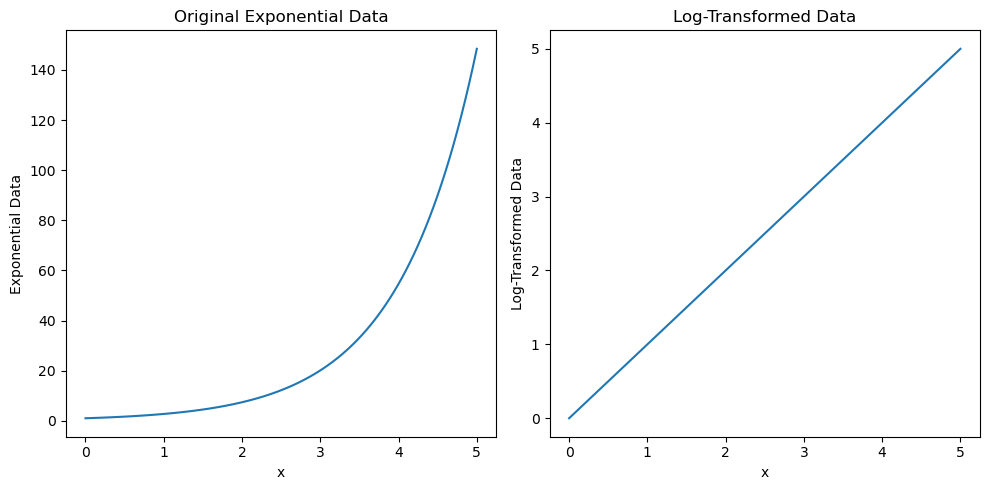

In [81]:
# Logarithmic Transformation

# Apply logarithmic transformation
log_transformed_data = np.log(exponential_data)

# Plot the original and transformed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, exponential_data)
plt.xlabel('x')
plt.ylabel('Exponential Data')
plt.title('Original Exponential Data')

plt.subplot(1, 2, 2)
plt.plot(x, log_transformed_data)
plt.xlabel('x')
plt.ylabel('Log-Transformed Data')
plt.title('Log-Transformed Data')
plt.tight_layout()

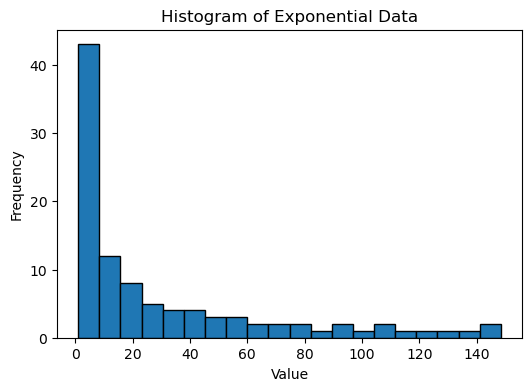

In [84]:
# Examine Histograms

# Plot histogram of exponential data
plt.figure(figsize=(6, 4))
plt.hist(exponential_data, bins=20, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Exponential Data');

`Create a Q-Q plot `
- by plotting the `quantiles of your data` against the `quantiles of an exponential distribution`. 
- If the points fall approximately on a straight line, your data might be exponential.

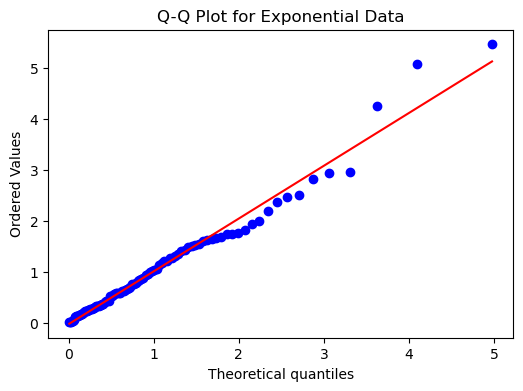

In [88]:
# Quantile-Quantile (Q-Q) Plot

import scipy.stats as stats

# Generate random exponential-like data
random_exponential = np.random.exponential(scale=1, size=100)

# Create Q-Q plot
plt.figure(figsize=(6, 4))
stats.probplot(random_exponential, dist='expon', plot=plt)
plt.title('Q-Q Plot for Exponential Data');

In [91]:
# Statistical Tests

from scipy.stats import kstest

# Generate exponential data
exponential_data = np.random.exponential(scale=1, size=100)

# Perform Kolmogorov-Smirnov test
test_statistic, p_value = kstest(exponential_data, 'expon')

# Print the test result
print("Kolmogorov-Smirnov test statistic:", test_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value > alpha:
    print("The data follows an exponential distribution (fail to reject H0)")
else:
    print("The data does not follow an exponential distribution (reject H0)")

Kolmogorov-Smirnov test statistic: 0.06954354569317933
p-value: 0.69234820046714
The data follows an exponential distribution (fail to reject H0)


**Example** - compute GM using scipy

In [33]:
from scipy.stats.mstats import gmean

# Example dataset
data = [2, 4, 8, 16, 32]

arr1 = gmean(data)
  
print("Geometric Mean is :", arr1)

Geometric Mean is : 7.999999999999998


In [35]:
# Example dataset
data = [5, 10, -8, 12, 6]

arr1 = gmean(data)
  
print("Geometric Mean is :", arr1)

Geometric Mean is : nan


D:\anaconda\Lib\site-packages\scipy\stats\_stats_py.py:267: RuntimeWarning: invalid value encountered in log
  log_a = np.log(a)


**Example** - compute GM using numpy

In [32]:
import numpy as np

# Example dataset
data = [2, 4, 8, 16, 32]

# Calculate the geometric mean
geometric_mean = np.prod(data) ** (1 / len(data))

print("Geometric Mean:", geometric_mean)

Geometric Mean: 8.000000000000002


In [34]:
# Example dataset
data = [5, 10, -8, 12, 6]

# Calculate the geometric mean
geometric_mean = np.prod(data) ** (1 / len(data))

print("Geometric Mean:", geometric_mean)

Geometric Mean: nan


C:\Users\bhupe\AppData\Local\Temp\ipykernel_19792\2706821801.py:5: RuntimeWarning: invalid value encountered in power
  geometric_mean = np.prod(data) ** (1 / len(data))


In [36]:
data = [5, 10, 8, 12, 6]

# Calculate the geometric mean
geometric_mean = np.prod(data) ** (1 / len(data))

print("Geometric Mean:", geometric_mean)

Geometric Mean: 7.796119681832379


**Example** - impute values

(not a complete code -:( )

In [31]:
# Parameters
years = 20
interest_rate = 0.03
compounding_frequency = 4  # Quarterly compounding

In [50]:
# Create a sample dataframe with 20 years of data
data = {
    'Year': list(range(1, years + 1)),
    'Initial_Value': [1000 * (1 + interest_rate / compounding_frequency) ** (compounding_frequency * year) for year in range(1, years + 1)],
    'Interest_Rate': [interest_rate] * years,
    'Ending_Value': [1000 * (1 + interest_rate / compounding_frequency) ** (compounding_frequency * year) for year in range(1, years + 1)]
}

In [64]:
# Convert the data dictionary into a DataFrame
df = pd.DataFrame(data)

In [65]:
df.shape

(20, 4)

In [66]:
# Introduce NaN values randomly in the Initial_Value column
np.random.seed(42)  # For reproducibility
nan_indices = np.random.choice(years, size=3, replace=False)
initial_nan_values = df.loc[nan_indices, 'Initial_Value']
df.loc[nan_indices, 'Initial_Value'] = np.nan

In [67]:
df.isnull().sum()

Year             0
Initial_Value    3
Interest_Rate    0
Ending_Value     0
dtype: int64

In [68]:
# Sort the DataFrame by 'Year' column
df = df.sort_values('Year')

In [70]:
# Interpolate missing values while preserving the multiplicative relationship
for col in ['Initial_Value']:
    missing_indices = df.index[df[col].isnull()]
    for idx in missing_indices:
        current_year = df.loc[idx, 'Year']
        prev_year = current_year - 1
        next_year = current_year + 1
        
        if prev_year in df['Year'].values and next_year in df['Year'].values:
            prev_value = df.loc[df['Year'] == prev_year, col].values[0]
            next_value = df.loc[df['Year'] == next_year, col].values[0]
            prev_interest_rate = df.loc[df['Year'] == prev_year, 'Interest_Rate'].values[0]
            next_interest_rate = df.loc[df['Year'] == next_year, 'Interest_Rate'].values[0]

            interpolated_value = prev_value * (1 + prev_interest_rate / compounding_frequency) ** compounding_frequency / (1 + next_interest_rate / compounding_frequency) ** compounding_frequency
            df.loc[idx, col] = interpolated_value
            #print(f"Initial Value (Year {current_year}): {initial_nan_values[nan_indices.tolist().index(current_year)]:.2f} - New Value: {interpolated_value:.2f}")

print(df)

    Year  Initial_Value  Interest_Rate  Ending_Value
0      1            NaN           0.03   1030.339191
1      2    1061.598848           0.03   1061.598848
2      3    1093.806898           0.03   1093.806898
3      4    1126.992114           0.03   1126.992114
4      5    1161.184142           0.03   1161.184142
5      6    1196.413529           0.03   1196.413529
6      7    1232.711748           0.03   1232.711748
7      8    1270.111224           0.03   1270.111224
8      9    1308.645371           0.03   1308.645371
9     10    1348.348612           0.03   1348.348612
10    11    1389.256418           0.03   1389.256418
11    12    1431.405333           0.03   1431.405333
12    13    1474.833013           0.03   1474.833013
13    14    1519.578253           0.03   1519.578253
14    15    1565.681027           0.03   1565.681027
15    16    1565.681027           0.03   1613.182522
16    17    1662.125174           0.03   1662.125174
17    18    1662.125174           0.03   1712.

#### Harmonic mean

Use Case: Speed or rate calculations; when dealing with rates or ratios.

In [75]:
# Sample dataset
#data = [2, 4, 8]

data = [.9, .6, .8]

harmonic_mean = len(data) / np.sum(1 / np.array(data))

print(f"Harmonic Mean: {harmonic_mean:.2f}")

Harmonic Mean: 0.74


**Example** - analyze data for harmonic patterns

In [92]:
from scipy.signal import find_peaks

In [93]:
# Generate synthetic harmonic data (sum of two sine waves)
t = np.linspace(0, 10, 200)
data = np.sin(2 * np.pi * 1 * t) + 0.5 * np.sin(2 * np.pi * 2 * t)

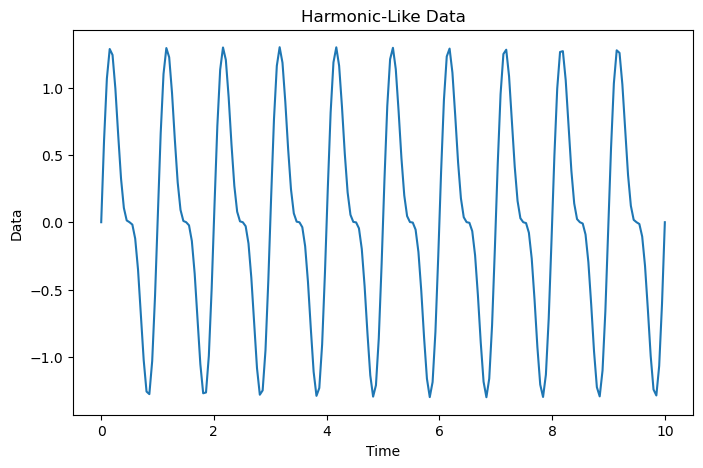

In [94]:
# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(t, data)
plt.xlabel('Time')
plt.ylabel('Data')
plt.title('Harmonic-Like Data')
plt.show()

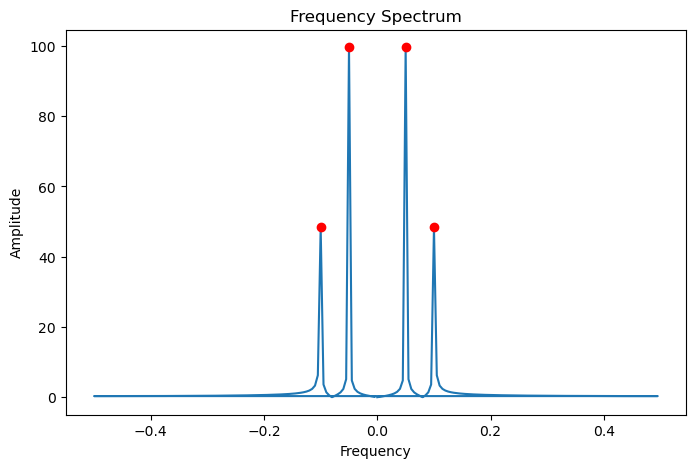

In [95]:
# Frequency analysis using Fourier Transform
fft_result = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(fft_result))
amplitudes = np.abs(fft_result)

# Find peaks in the frequency domain
peaks, _ = find_peaks(amplitudes, height=10)

# Plot the frequency spectrum
plt.figure(figsize=(8, 5))
plt.plot(frequencies, amplitudes)
plt.plot(frequencies[peaks], amplitudes[peaks], 'ro')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.show()

#### Weighted Mean

In [7]:
weights = [0.2, 0.3, 0.1, 0.2, 0.2]
weighted_mean = np.average(data, weights=weights)

print(f"Weighted Mean: {weighted_mean:.2f}")

Weighted Mean: 29.00


Use Case: Survey responses with different levels of importance; when some data points have more influence.

#### Quadratic Mean (Root Mean Square):

In [8]:
quadratic_mean = np.sqrt(np.mean(np.array(data) ** 2))

print(f"Quadratic Mean: {quadratic_mean:.2f}")

Quadratic Mean: 33.17


Use Case: Electrical engineering; calculating root mean square values of signals.

#### Midrange

In [11]:
midrange = (np.min(data) + np.max(data)) / 2

print(f"Midrange: {midrange:.2f}")

Midrange: 30.00


Use Case: Temperature ranges; simple measure of central tendency.

#### Winsorized Mean

In [15]:
data = [85, 92, 78, 88, 95]

# Set the percentage of extreme values to trim
lower_percentile = 0.1
upper_percentile = 0.1

# Calculate the number of extreme values to trim
lower_limit = int(len(data) * lower_percentile)
upper_limit = int(len(data) * upper_percentile)

# Sort the data
sorted_data = sorted(data)

# Trim extreme values
trimmed_data = sorted_data[lower_limit : len(data) - upper_limit]

# Calculate the Winsorized Mean
winsorized_mean = sum(trimmed_data) / len(trimmed_data)

print(f"Winsorized Mean: {winsorized_mean:.2f}")



Winsorized Mean: 87.60


**Example**- with outliers

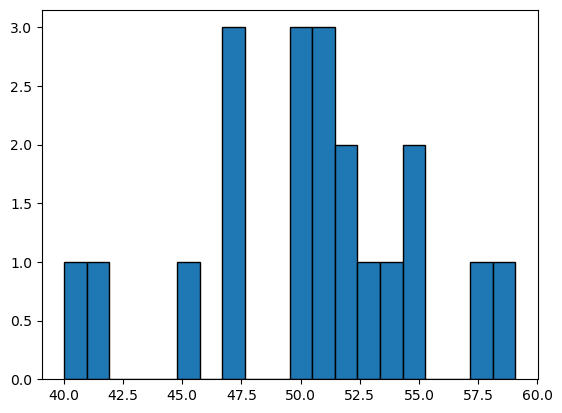

In [28]:
scores = np.random.normal(loc=50, scale=5, size=20)
plt.hist(scores, bins=20, edgecolor='black');

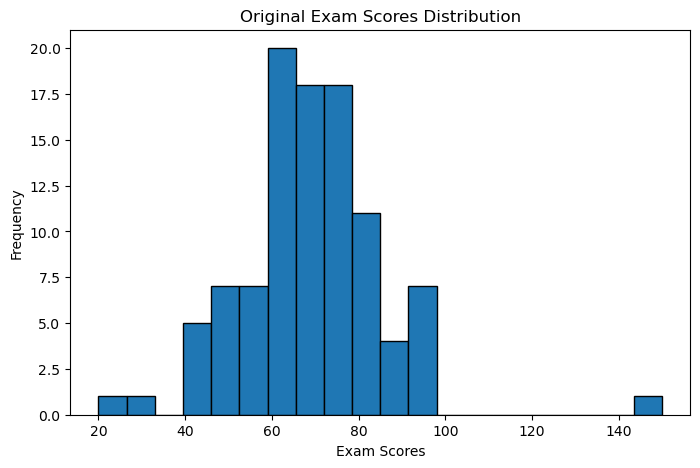

In [29]:
# Generate synthetic exam scores data with outliers
np.random.seed(42)
num_students = 100
scores = np.random.normal(loc=70, scale=15, size=num_students)
scores[5] = 150  # Introduce an outlier (high score)
scores[15] = 20  # Introduce an outlier (low score)

# Plot the original scores distribution
plt.figure(figsize=(8, 5))
plt.hist(scores, bins=20, edgecolor='black')
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.title('Original Exam Scores Distribution')
plt.show()

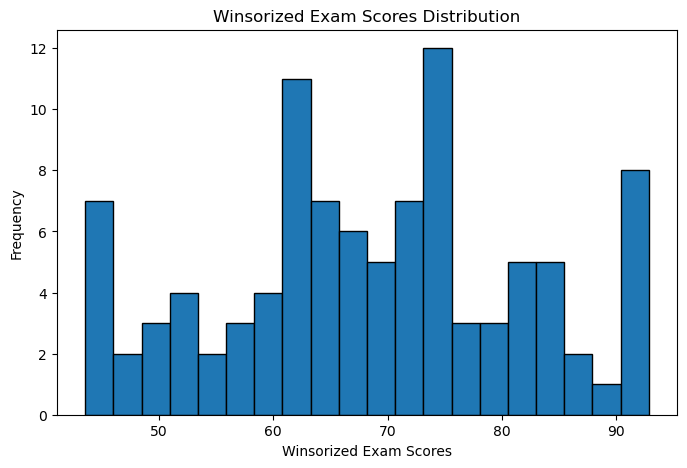

In [98]:
from scipy.stats.mstats import winsorize

# Apply Winsorizing to cap extreme values at 5th and 95th percentiles
winsorized_scores = winsorize(scores, limits=[0.05, 0.05])

# Plot the Winsorized scores distribution
plt.figure(figsize=(8, 5))
plt.hist(winsorized_scores, bins=20, edgecolor='black')
plt.xlabel('Winsorized Exam Scores')
plt.ylabel('Frequency')
plt.title('Winsorized Exam Scores Distribution')
plt.show()
